In [ ]:
!pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.3/344.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 19.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.1 which is incompatible.


In [ ]:
!pip install scikit-learn==1.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 13.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.1.post1
    Uninstalling scikit-learn-1.4.1.post1:
      Successfully uninstalled scikit-learn-1.4.1.post1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
feature-engine 1.7.0 requires scikit-learn>=1.4.0, but you have scikit-learn 1.2.2 which is incompatible.


In [ ]:
!pip install imblearn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from feature_engine.selection import DropCorrelatedFeatures
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve, roc_auc_score, average_precision_score, precision_recall_curve,ConfusionMatrixDisplay
import seaborn as sns

In [ ]:
# Import data
df = pd.read_csv('/content/drive/MyDrive/Data Mining Project/Covid Data.csv')
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [ ]:
# Number of rows and columns of dataset
print("Rows and columns of dataset:", df.shape)

Rows and columns of dataset: (1048575, 21)


In [ ]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [ ]:
# Check number of missing data
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [ ]:
# Check the min, max ,and mean of each attribute
df.describe().T

,count,mean,std,min,25%,50%,75%,max
USMER,1048575.0,1.632194,0.482208,1.0,1.0,2.0,2.0,2.0
MEDICAL_UNIT,1048575.0,8.980565,3.723278,1.0,4.0,12.0,12.0,13.0
SEX,1048575.0,1.499259,0.500000,1.0,1.0,1.0,2.0,2.0
PATIENT_TYPE,1048575.0,1.190765,0.392904,1.0,1.0,1.0,1.0,2.0
INTUBED,1048575.0,79.522875,36.868886,1.0,97.0,97.0,97.0,99.0
PNEUMONIA,1048575.0,3.346831,11.912881,1.0,2.0,2.0,2.0,99.0
AGE,1048575.0,41.794102,16.907389,0.0,30.0,40.0,53.0,121.0
PREGNANT,1048575.0,49.765585,47.510733,1.0,2.0,97.0,97.0,98.0
DIABETES,1048575.0,2.186404,5.424242,1.0,2.0,2.0,2.0,98.0
COPD,1048575.0,2.260569,5.132258,1.0,2.0,2.0,2.0,98.0


In [ ]:
print(df.columns)

print("Total number of columns:", len(df.columns))

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')
Total number of columns: 21


In [ ]:
df['IS_DEAD']=df['DATE_DIED'].apply(lambda x: 1 if x=='9999-99-99' else 0) # if label as 1 if expire, 0 if survival
df['IS_DEAD'].value_counts()

IS_DEAD
1    971633
0     76942
Name: count, dtype: int64

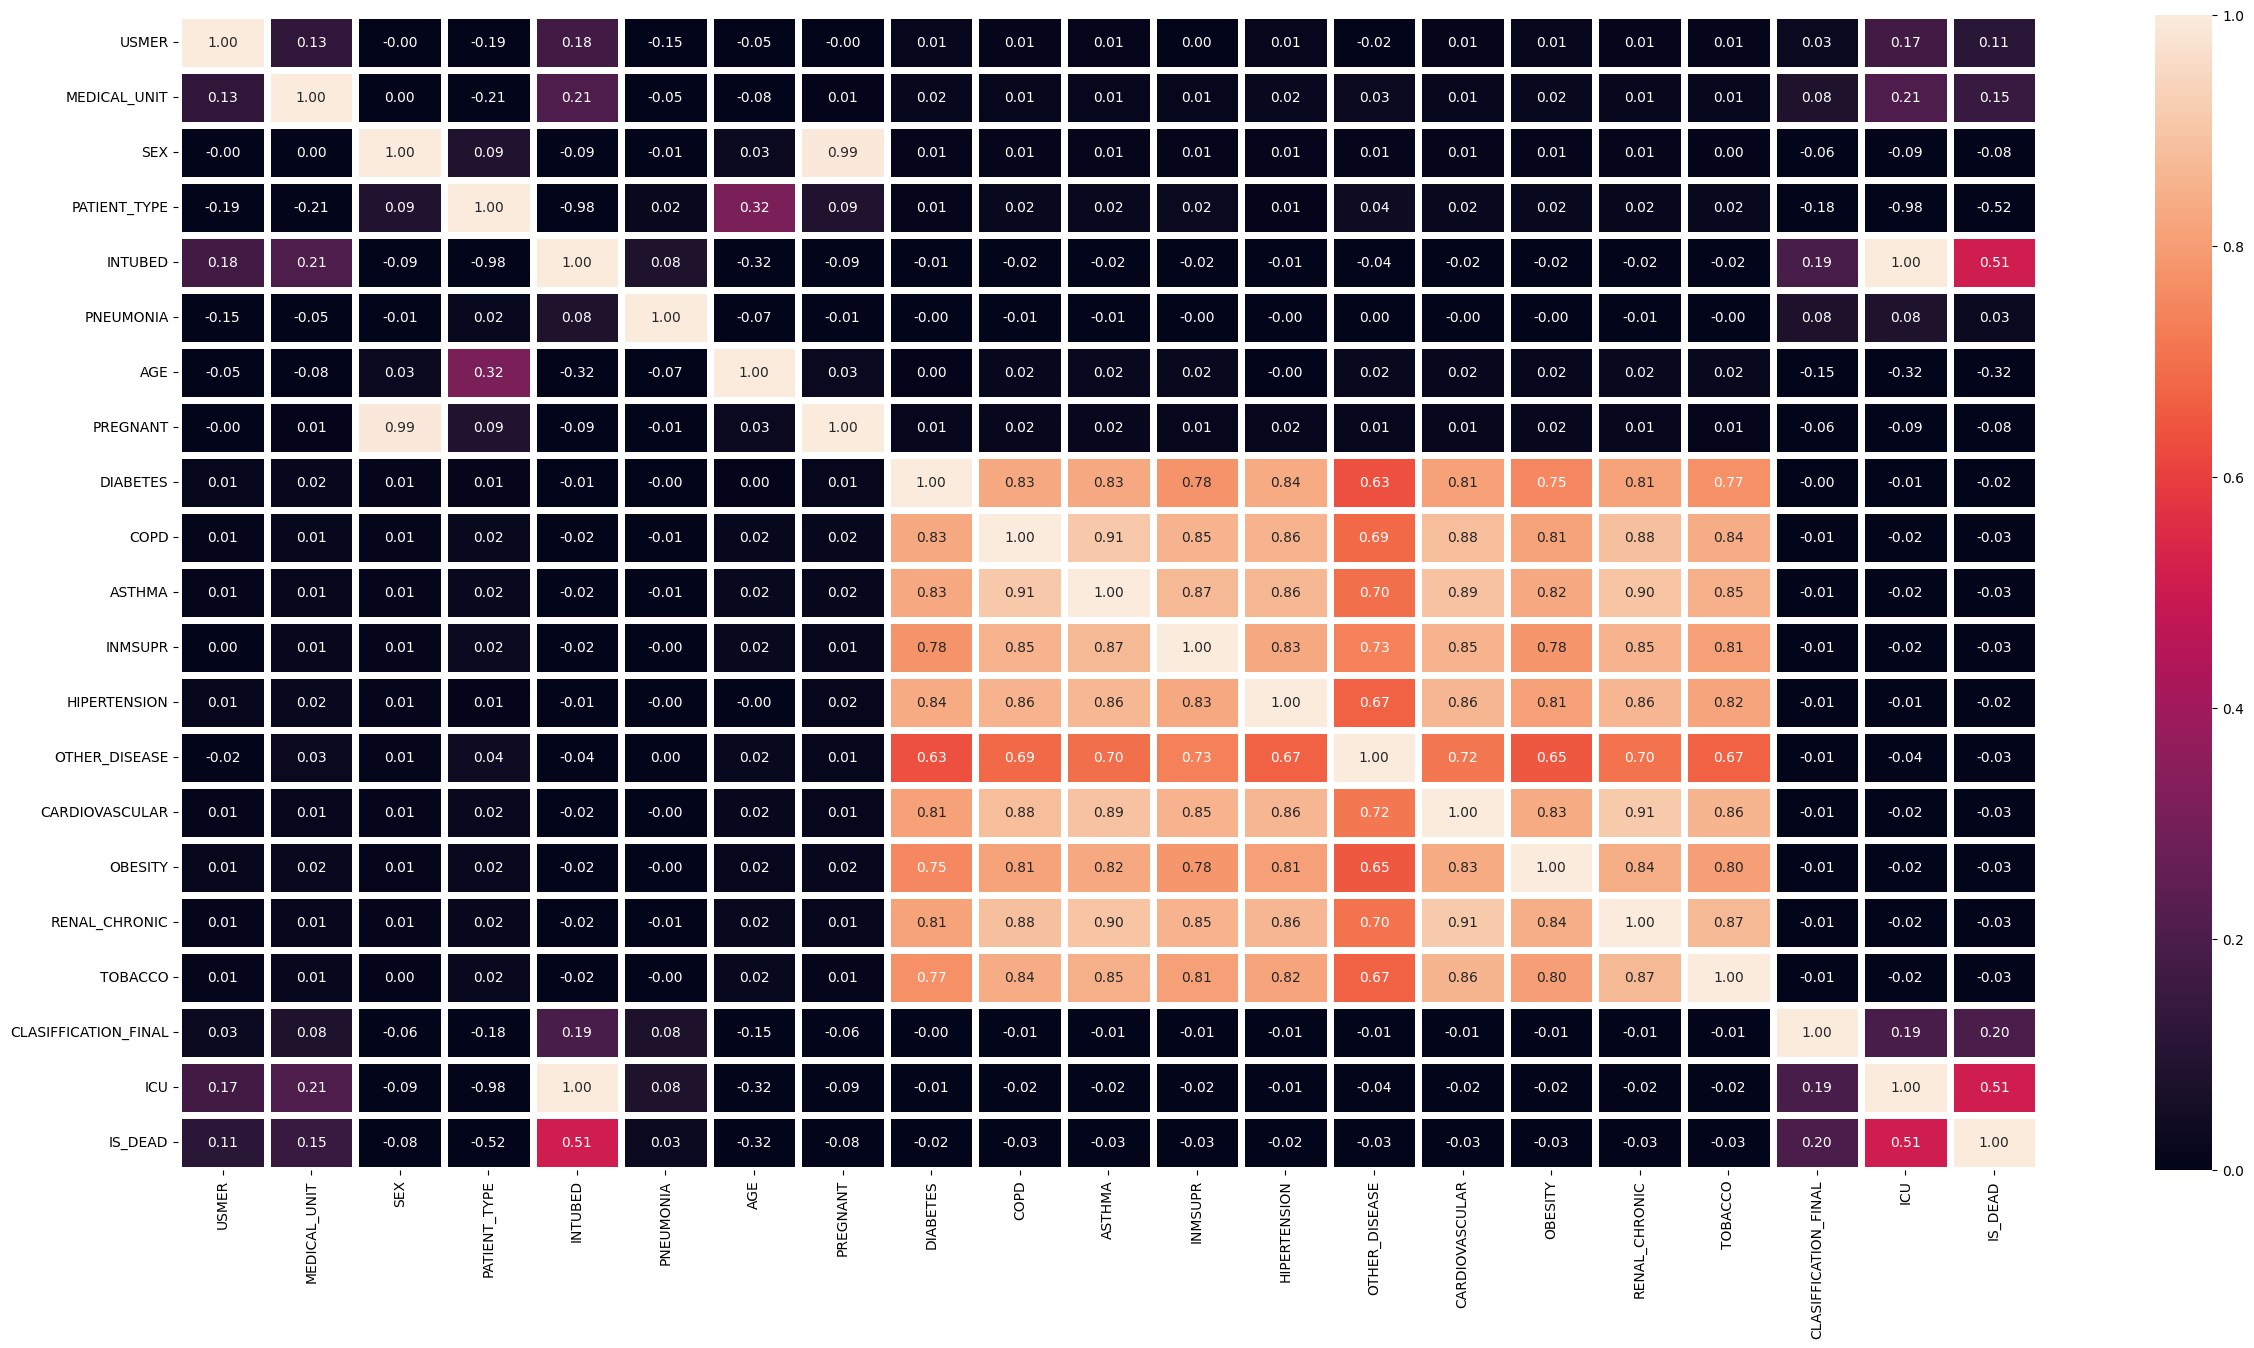

In [ ]:
df_no_date_died = df.drop(['DATE_DIED'], axis=1)
plt.figure(figsize=(30, 15))
sns.heatmap(df_no_date_died.corr(), vmin=0, vmax=1, cbar = True, linewidths = 5, annot = True, fmt=".2f")
plt.show()

In [ ]:
y = df["IS_DEAD"]
X = df.drop(["IS_DEAD",'DATE_DIED'] , axis =1 )
X= pd.DataFrame(X)
y = pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, train_size = 0.8)

In [ ]:
corrolated = DropCorrelatedFeatures(method="pearson", threshold=0.85)
corrolated.fit(df)

DropCorrelatedFeatures(threshold=0.85)

In [ ]:
print(corrolated.features_to_drop_)
print(corrolated.correlated_feature_sets_)

['CARDIOVASCULAR', 'COPD', 'HIPERTENSION', 'INMSUPR', 'RENAL_CHRONIC', 'INTUBED', 'PATIENT_TYPE', 'SEX']
[{'HIPERTENSION', 'COPD', 'RENAL_CHRONIC', 'CARDIOVASCULAR', 'INMSUPR', 'ASTHMA'}, {'ICU', 'PATIENT_TYPE', 'INTUBED'}, {'SEX', 'PREGNANT'}]


In [ ]:
X_train.drop(corrolated.features_to_drop_, axis=1, inplace=True)
X_test.drop(corrolated.features_to_drop_, axis=1, inplace=True)
print(X_train.shape)
print(X_test.shape)

(838860, 12)
(209715, 12)


In [ ]:
# if label as 1 if expire, 0 if survival
y_train.value_counts()

IS_DEAD
1          777158
0           61702
Name: count, dtype: int64

In [ ]:
777158*2/(777158+61702)

1.8528908280285148

In [ ]:
under_sampler = RandomUnderSampler(sampling_strategy = 'auto',  random_state = 42, replacement = True)
X_train_auto, y_train_auto = under_sampler.fit_resample(X_train,y_train)

In [ ]:
y_train_auto.value_counts()

IS_DEAD
0          61702
1          61702
Name: count, dtype: int64

In [ ]:
#under_sampler = RandomUnderSampler(sampling_strategy = 0.2,  random_state = 42, replacement = True)
#X_train_05, y_train_05 = under_sampler.fit_resample(X_train,y_train)
#print(y_train_05.value_counts())

In [ ]:
over_sampling = RandomOverSampler(sampling_strategy = 0.1,  random_state = 42)
X_train_auto, y_train_auto = over_sampling.fit_resample(X_train,y_train)
print(y_train_auto.value_counts())

IS_DEAD
1          777158
0           77715
Name: count, dtype: int64


In [ ]:
#over_sampling = RandomOverSampler(sampling_strategy = 1,  random_state = 42)
#X_train_auto, y_train_auto = over_sampling.fit_resample(X_train,y_train)
#print(y_train_auto.value_counts())

In [ ]:
decision_tree = DecisionTreeClassifier(random_state = 42,splitter = 'best', criterion= "gini")
decision_tree.fit(X_train, y_train)
y_pred_train =  decision_tree.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72     61702
           1       0.98      0.98      0.98    777158

    accuracy                           0.96    838860
   macro avg       0.86      0.85      0.85    838860
weighted avg       0.96      0.96      0.96    838860



In [ ]:
y_pred_test =  decision_tree.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.53      0.52      0.53     15240
           1       0.96      0.96      0.96    194475

    accuracy                           0.93    209715
   macro avg       0.75      0.74      0.74    209715
weighted avg       0.93      0.93      0.93    209715



Basic AUC Score for Decision Tree Classifier: 0.8534617853639872


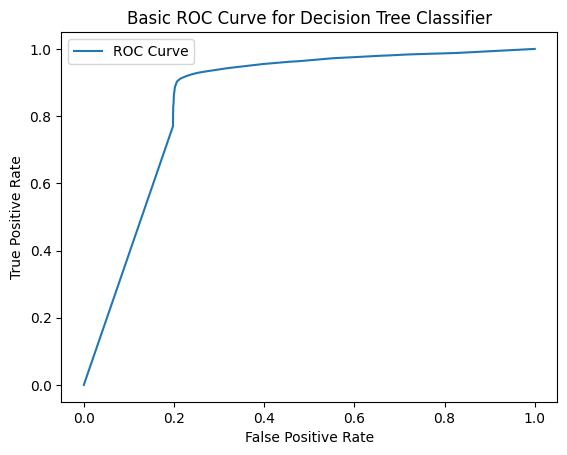

In [ ]:
y_prob = decision_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)
print(f'Basic AUC Score for Decision Tree Classifier: {auc_score}')

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Basic ROC Curve for Decision Tree Classifier')
plt.legend()
plt.show()

In [ ]:
y_train_auto.value_counts()

IS_DEAD
1          777158
0           77715
Name: count, dtype: int64

In [ ]:
decision_tree = DecisionTreeClassifier(random_state = 42,splitter = 'best', criterion= "gini")
decision_tree.fit(X_train_auto, y_train_auto)
y_pred_train_auto =  decision_tree.predict(X_train_auto)
print(classification_report(y_train_auto, y_pred_train_auto))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76     77715
           1       0.98      0.97      0.98    777158

    accuracy                           0.96    854873
   macro avg       0.86      0.87      0.87    854873
weighted avg       0.96      0.96      0.96    854873



In [ ]:
y_pred_test=  decision_tree.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.52      0.57      0.54     15240
           1       0.97      0.96      0.96    194475

    accuracy                           0.93    209715
   macro avg       0.74      0.76      0.75    209715
weighted avg       0.93      0.93      0.93    209715



**Random Under Sampling**

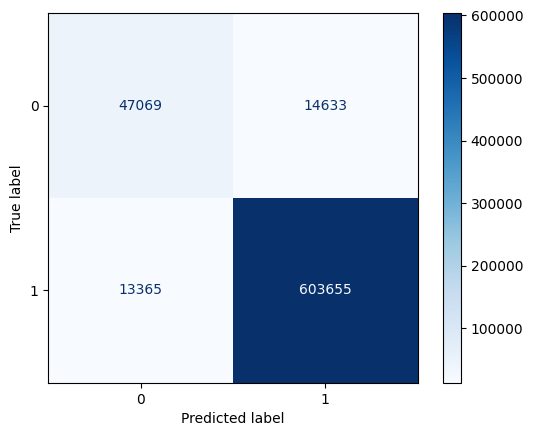

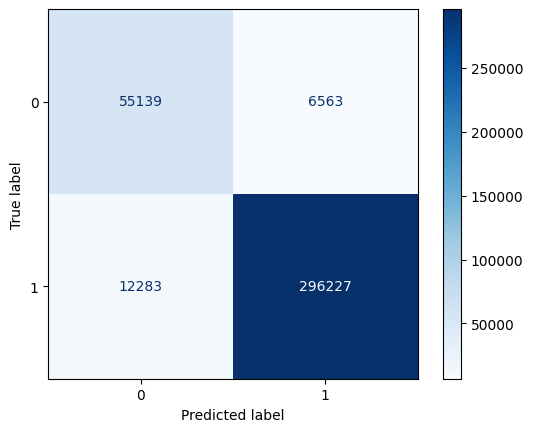

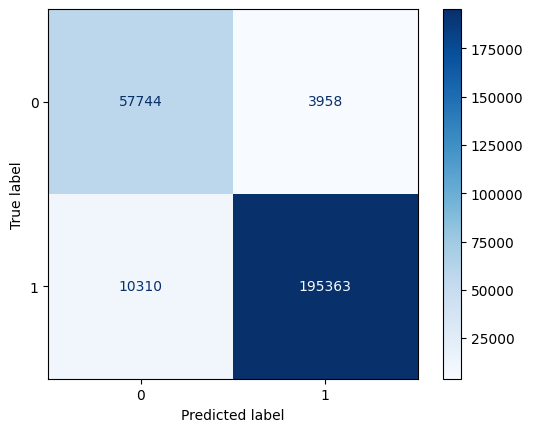

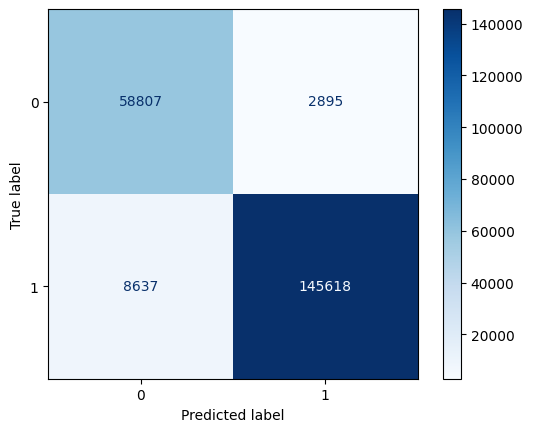

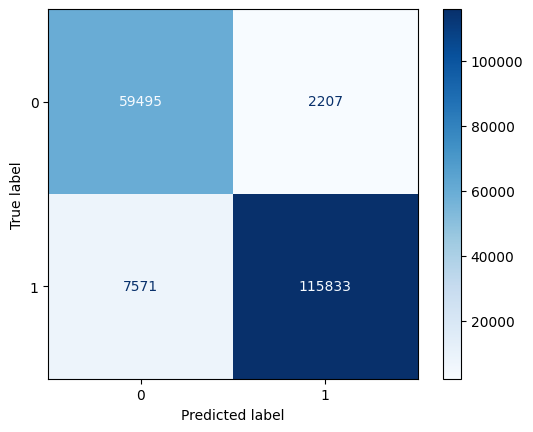

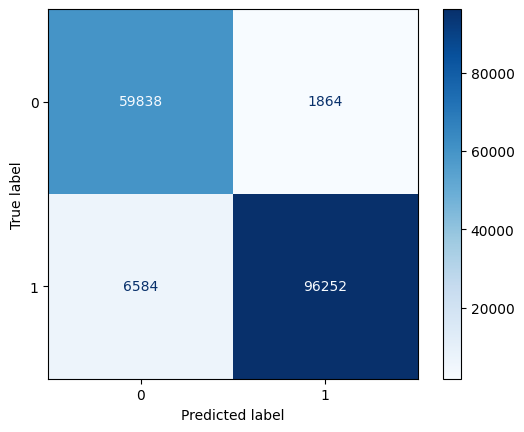

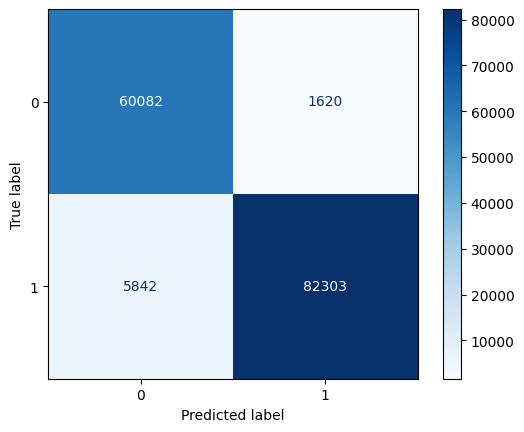

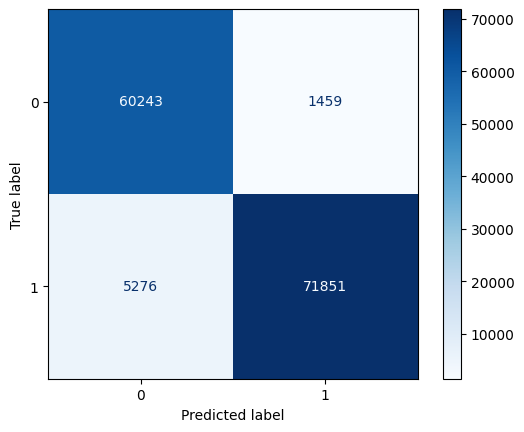

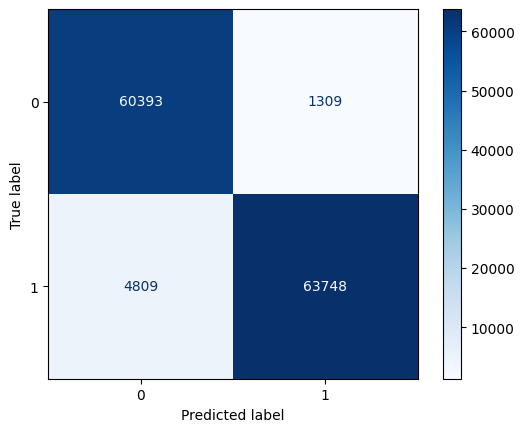

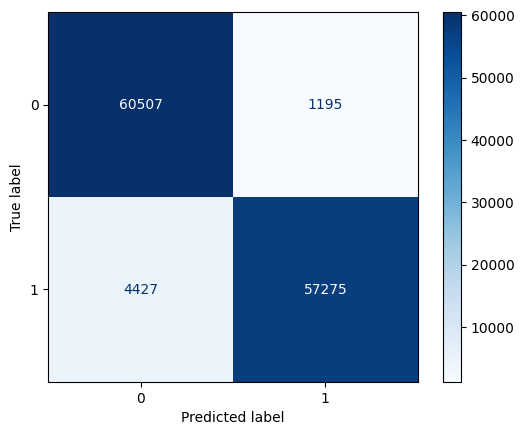

In [ ]:
ratio = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
precision_minority=[]
precision_majority=[]
recall_minority=[]
recall_majority=[]
f1_minority=[]
f1_majority=[]
auc=[]
auprc=[]
for i in ratio:
  under_sampler = RandomUnderSampler(sampling_strategy = i,  random_state = 42, replacement = True)
  X_train_new, y_train_new = under_sampler.fit_resample(X_train,y_train)
  decision_tree = DecisionTreeClassifier(random_state = 42,splitter = 'best', criterion= "gini")
  decision_tree.fit(X_train_new, y_train_new)
  y_pred_train_new =  decision_tree.predict(X_train_new)
  report = classification_report(y_train_new, y_pred_train_new, output_dict=True)
  precision_minority.append(report['0']['precision'])
  precision_majority.append(report['1']['precision'])
  recall_minority.append(report['0']['recall'])
  recall_majority.append(report['1']['recall'])
  f1_minority.append(report['0']['f1-score'])
  f1_majority.append(report['1']['f1-score'])
  y_train_prob = decision_tree.predict_proba(X_train_new)[:, 1]
  auc_score_train = roc_auc_score(y_train_new, y_train_prob)
  auprc_score_train = average_precision_score(y_train_new, y_train_prob)
  auc.append(auc_score_train)
  auprc.append(auprc_score_train)
  disp = ConfusionMatrixDisplay.from_estimator(decision_tree,X_train_new, y_train_new, values_format="d", cmap=plt.cm.Blues)

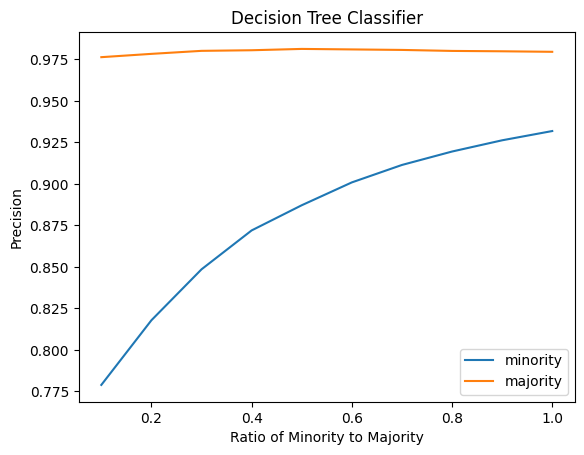

In [ ]:
plt.plot(ratio, precision_minority, label='minority')
plt.plot(ratio, precision_majority, label='majority')
plt.xlabel('Ratio of Minority to Majority')
plt.ylabel('Precision')
plt.title('Decision Tree Classifier')
plt.legend()
plt.show()

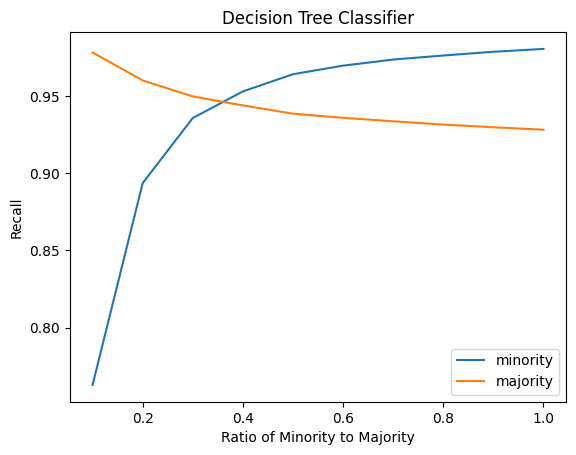

In [ ]:
plt.plot(ratio, recall_minority, label='minority')
plt.plot(ratio, recall_majority, label='majority')
plt.xlabel('Ratio of Minority to Majority')
plt.ylabel('Recall')
plt.title('Decision Tree Classifier')
plt.legend()
plt.show()

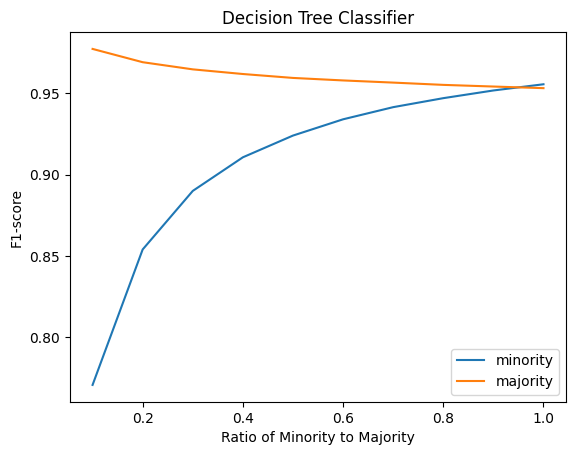

In [ ]:
plt.plot(ratio, f1_minority, label='minority')
plt.plot(ratio, f1_majority, label='majority')
plt.xlabel('Ratio of Minority to Majority')
plt.ylabel('F1-score')
plt.title('Decision Tree Classifier')
plt.legend()
plt.show()

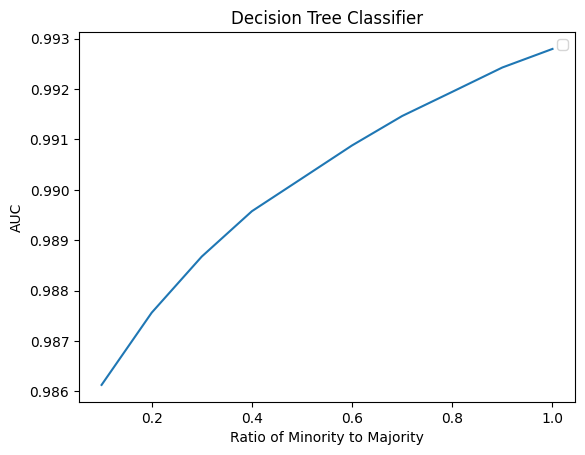

In [ ]:
plt.plot(ratio, auc)
plt.xlabel('Ratio of Minority to Majority')
plt.ylabel('AUC')
plt.title('Decision Tree Classifier')
plt.legend()
plt.show()

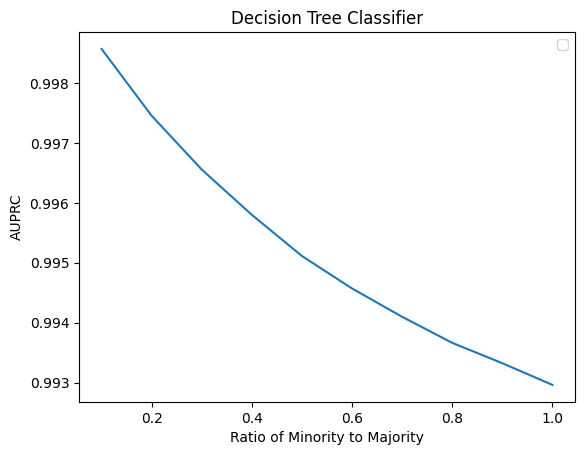

In [ ]:
plt.plot(ratio, auprc)
plt.xlabel('Ratio of Minority to Majority')
plt.ylabel('AUPRC')
plt.title('Decision Tree Classifier')
plt.legend()
plt.show()

**Random Over Sampling**

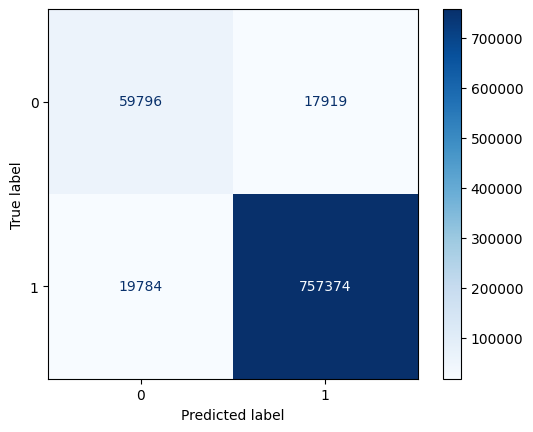

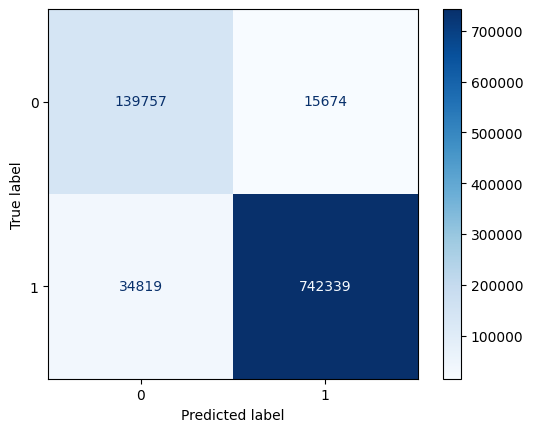

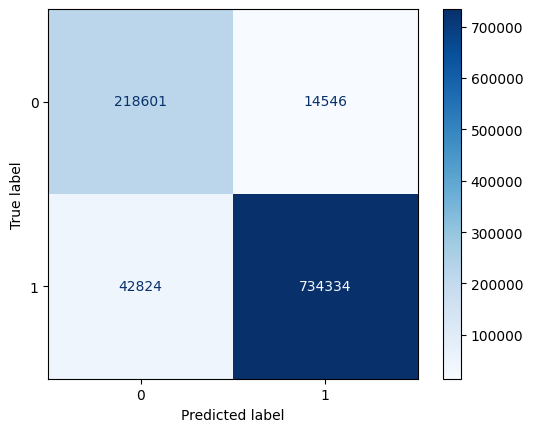

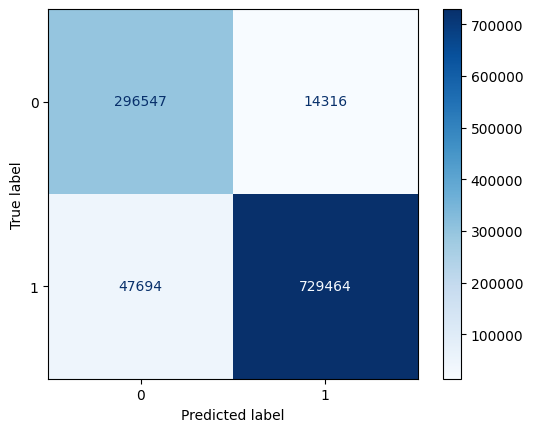

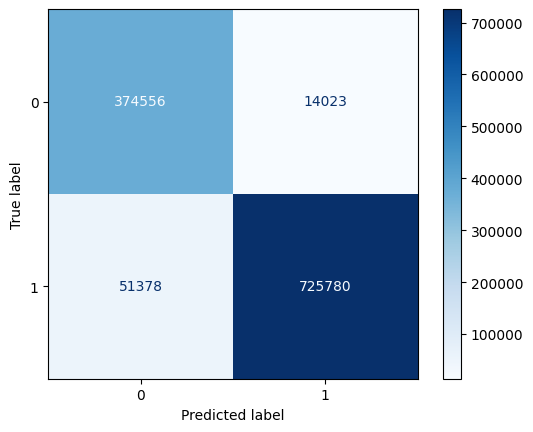

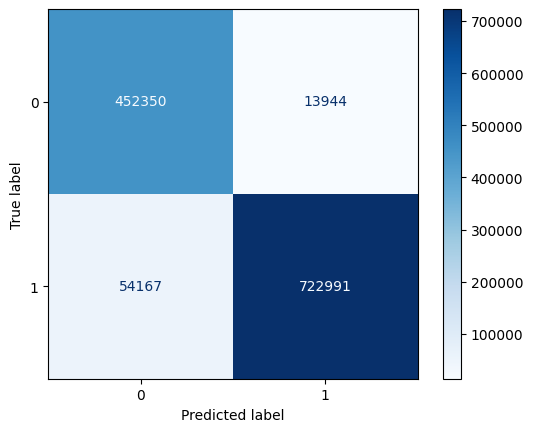

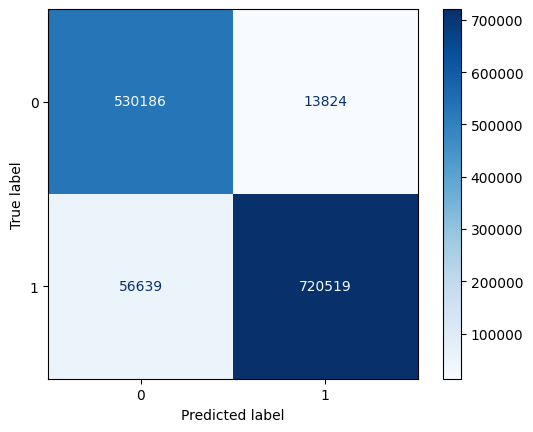

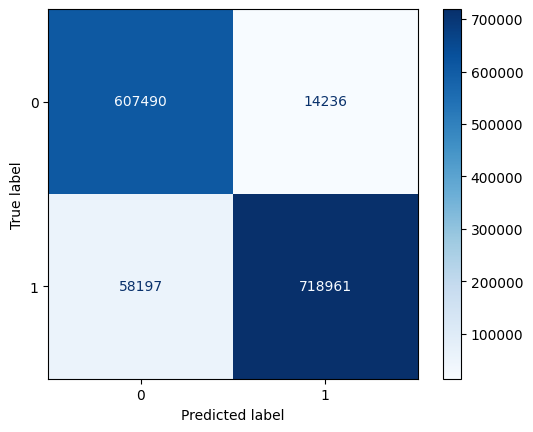

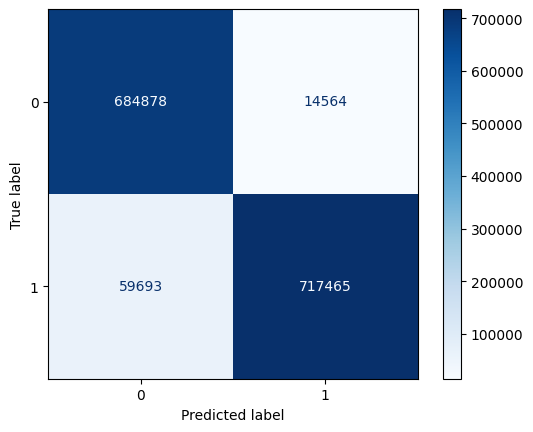

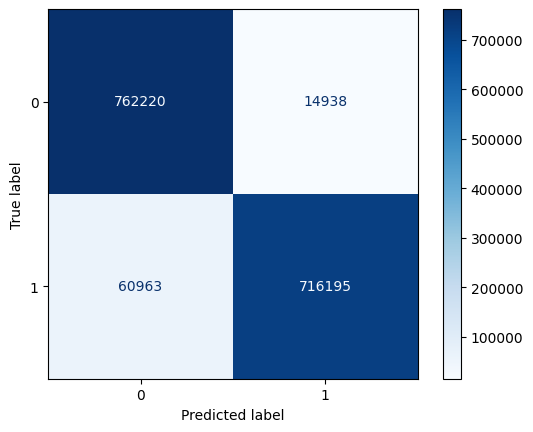

In [ ]:
ratio = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
precision_minority=[]
precision_majority=[]
recall_minority=[]
recall_majority=[]
f1_minority=[]
f1_majority=[]
auc=[]
auprc=[]
for i in ratio:
  over_sampler = RandomOverSampler(sampling_strategy = i,  random_state = 42)
  X_train_new, y_train_new = over_sampler.fit_resample(X_train,y_train)
  decision_tree = DecisionTreeClassifier(random_state = 42,splitter = 'best', criterion= "gini")
  decision_tree.fit(X_train_new, y_train_new)
  y_pred_train_new =  decision_tree.predict(X_train_new)
  report = classification_report(y_train_new, y_pred_train_new, output_dict=True)
  precision_minority.append(report['0']['precision'])
  precision_majority.append(report['1']['precision'])
  recall_minority.append(report['0']['recall'])
  recall_majority.append(report['1']['recall'])
  f1_minority.append(report['0']['f1-score'])
  f1_majority.append(report['1']['f1-score'])
  y_train_prob = decision_tree.predict_proba(X_train_new)[:, 1]
  auc_score_train = roc_auc_score(y_train_new, y_train_prob)
  auprc_score_train = average_precision_score(y_train_new, y_train_prob)
  auc.append(auc_score_train)
  auprc.append(auprc_score_train)
  disp = ConfusionMatrixDisplay.from_estimator(decision_tree,X_train_new, y_train_new, values_format="d", cmap=plt.cm.Blues)

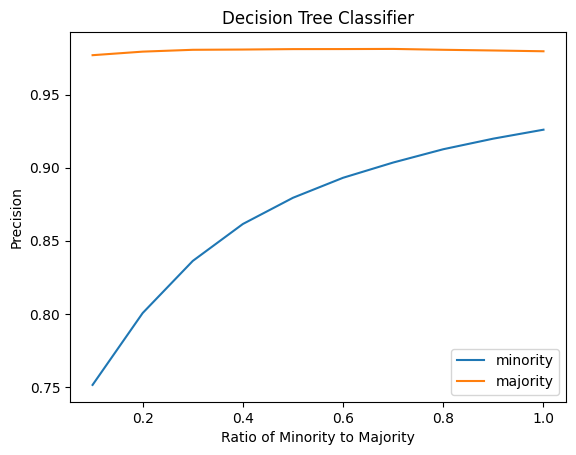

In [ ]:
plt.plot(ratio, precision_minority, label='minority')
plt.plot(ratio, precision_majority, label='majority')
plt.xlabel('Ratio of Minority to Majority')
plt.ylabel('Precision')
plt.title('Decision Tree Classifier')
plt.legend()
plt.show()

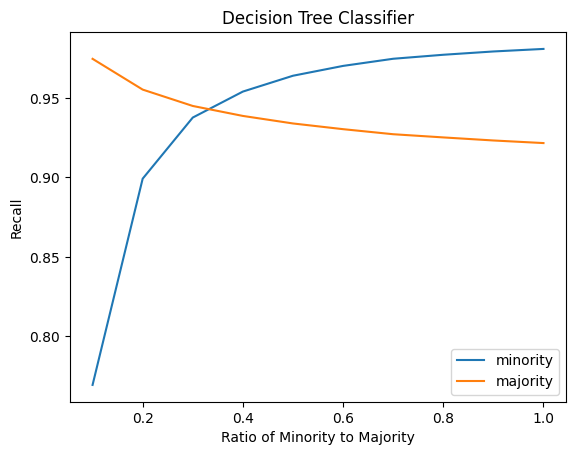

In [ ]:
plt.plot(ratio, recall_minority, label='minority')
plt.plot(ratio, recall_majority, label='majority')
plt.xlabel('Ratio of Minority to Majority')
plt.ylabel('Recall')
plt.title('Decision Tree Classifier')
plt.legend()
plt.show()

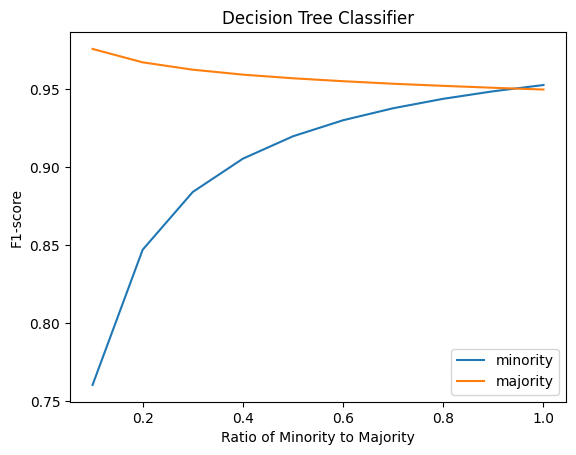

In [ ]:
plt.plot(ratio, f1_minority, label='minority')
plt.plot(ratio, f1_majority, label='majority')
plt.xlabel('Ratio of Minority to Majority')
plt.ylabel('F1-score')
plt.title('Decision Tree Classifier')
plt.legend()
plt.show()

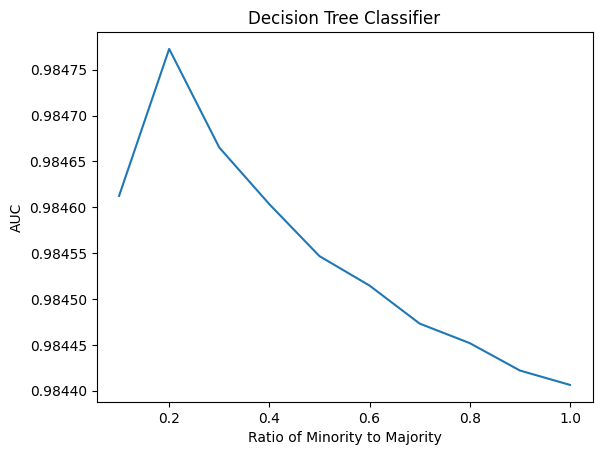

In [ ]:
plt.plot(ratio, auc)
plt.xlabel('Ratio of Minority to Majority')
plt.ylabel('AUC')
plt.title('Decision Tree Classifier')
plt.show()

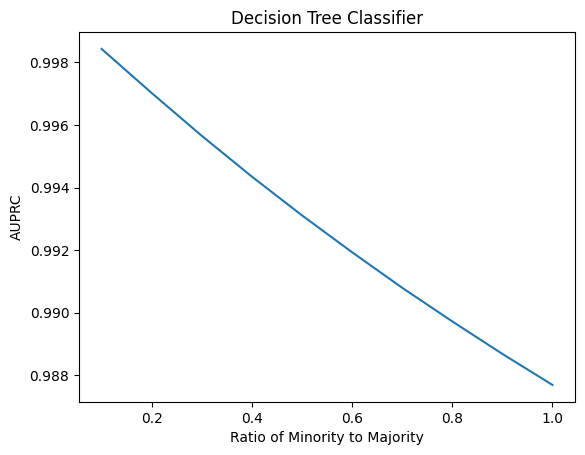

In [ ]:
plt.plot(ratio, auprc)
plt.xlabel('Ratio of Minority to Majority')
plt.ylabel('AUPRC')
plt.title('Decision Tree Classifier')
plt.show()

**Cost Sensitive Learning**

In [ ]:
decision_tree = DecisionTreeClassifier(random_state = 42,class_weight={0:12,1:1})
decision_tree.fit(X_train, y_train)
y_pred_train =  decision_tree.predict(X_train)
report = classification_report(y_train, y_pred_train, output_dict=True)
print(report)

{'0': {'precision': 0.4991787650938024, 'recall': 0.980195131438203, 'f1-score': 0.6614860467787008, 'support': 61702}, '1': {'precision': 0.9982973410932965, 'recall': 0.921921925786005, 'f1-score': 0.9585907433410108, 'support': 777158}, 'accuracy': 0.9262081873018143, 'macro avg': {'precision': 0.7487380530935495, 'recall': 0.951058528612104, 'f1-score': 0.8100383950598558, 'support': 838860}, 'weighted avg': {'precision': 0.9615848808778603, 'recall': 0.9262081873018143, 'f1-score': 0.9367373303909504, 'support': 838860}}


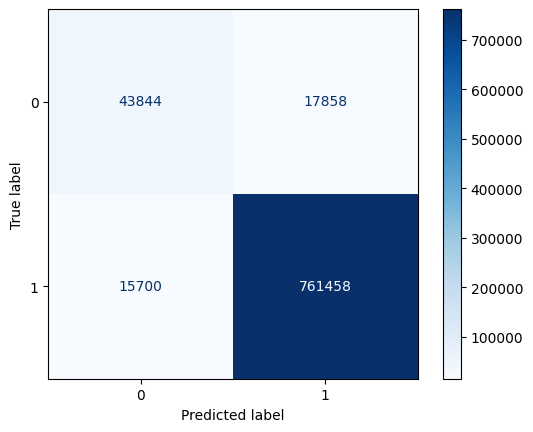

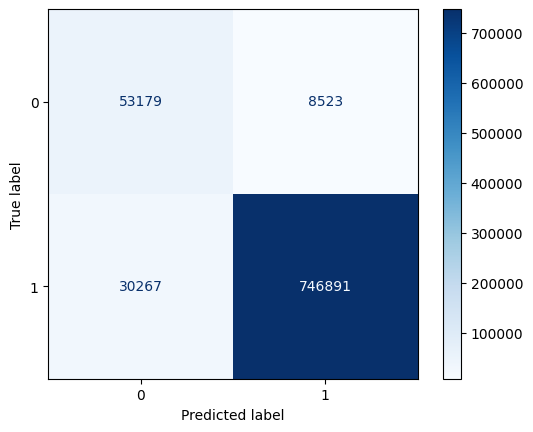

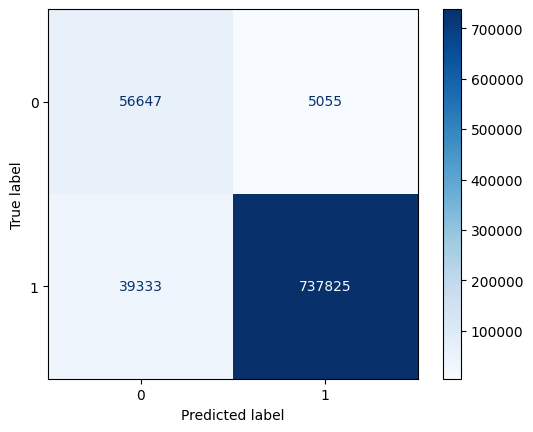

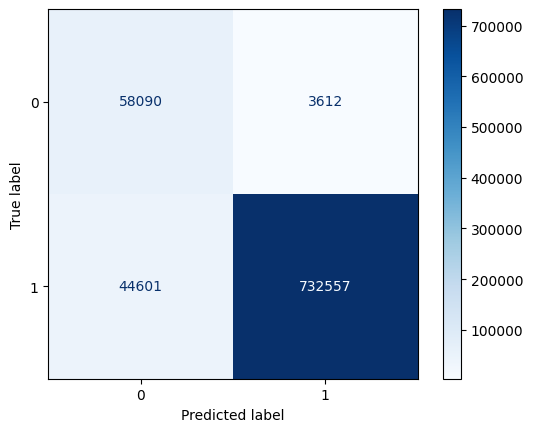

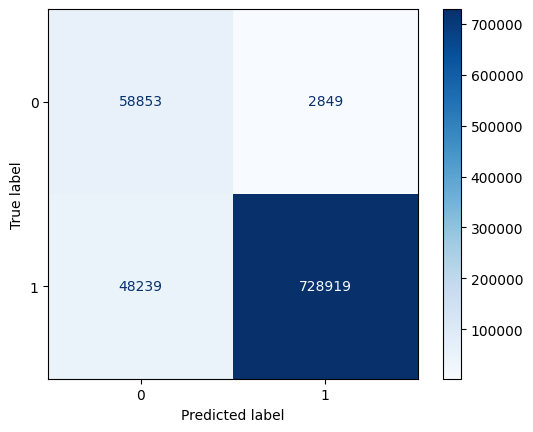

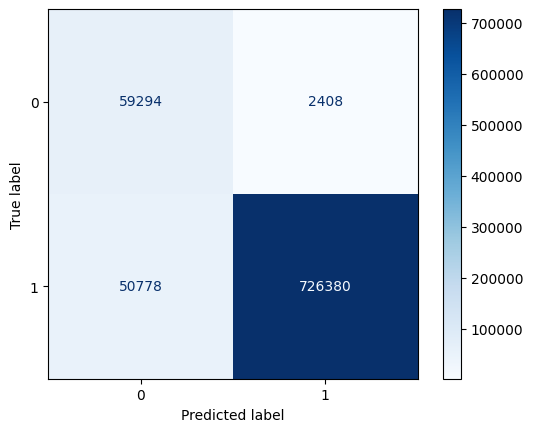

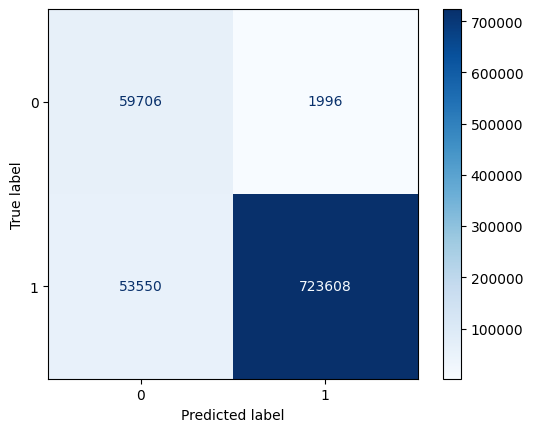

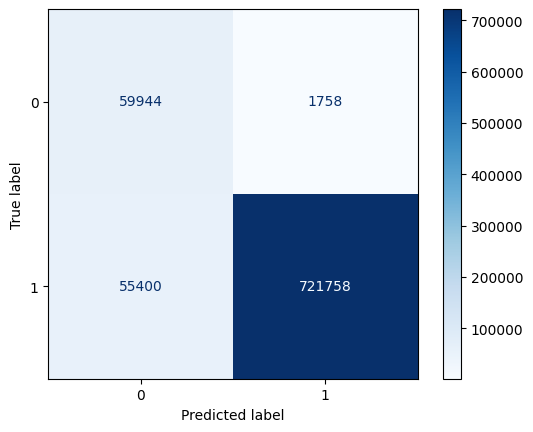

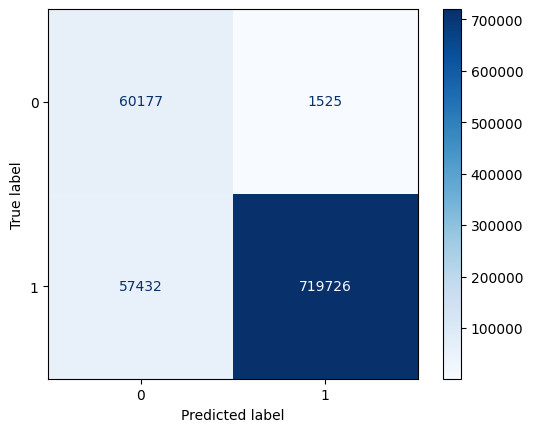

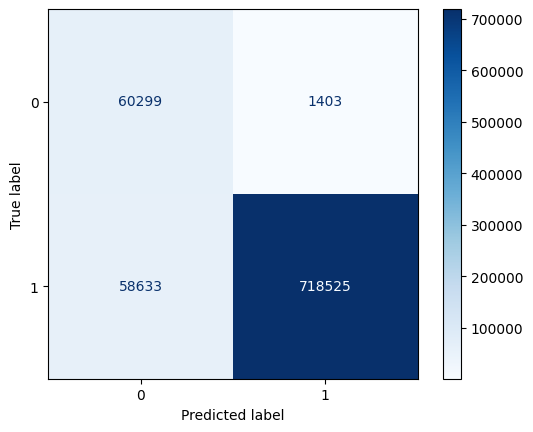

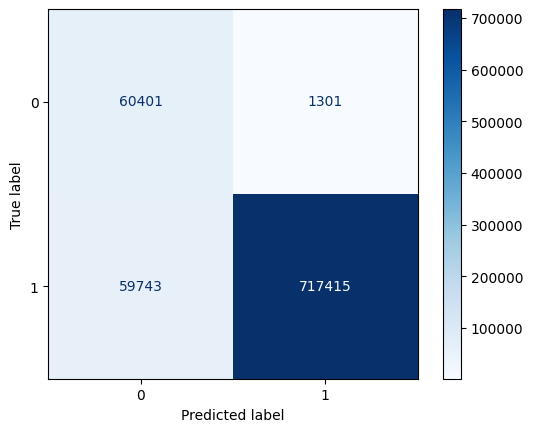

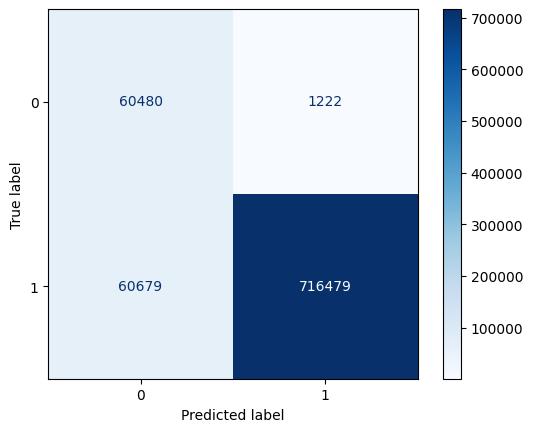

In [ ]:
ratio = [1,2,3,4,5,6,7,8,9,10,11,12]

precision_minority=[]
precision_majority=[]
recall_minority=[]
recall_majority=[]
f1_minority=[]
f1_majority=[]
auc=[]
auprc=[]
for i in ratio:
  decision_tree = DecisionTreeClassifier(random_state = 42,class_weight={0:i,1:1},splitter = 'best', criterion= "gini")
  decision_tree.fit(X_train, y_train)
  y_pred_train =  decision_tree.predict(X_train)
  report = classification_report(y_train, y_pred_train, output_dict=True)
  precision_minority.append(report['0']['precision'])
  precision_majority.append(report['1']['precision'])
  recall_minority.append(report['0']['recall'])
  recall_majority.append(report['1']['recall'])
  f1_minority.append(report['0']['f1-score'])
  f1_majority.append(report['1']['f1-score'])
  y_train_prob = decision_tree.predict_proba(X_train)[:, 1]
  auc_score_train = roc_auc_score(y_train, y_train_prob)
  auprc_score_train = average_precision_score(y_train, y_train_prob)
  auc.append(auc_score_train)
  auprc.append(auprc_score_train)
  disp = ConfusionMatrixDisplay.from_estimator(decision_tree,X_train, y_train, values_format="d", cmap=plt.cm.Blues)
  #disp.plot()
  #plt.show()

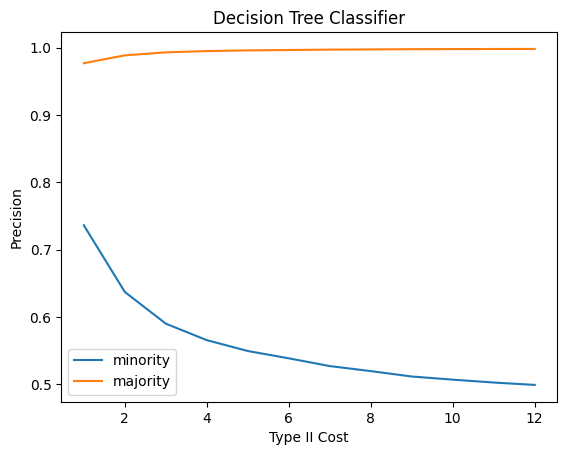

In [ ]:
plt.plot(ratio, precision_minority, label='minority')
plt.plot(ratio, precision_majority, label='majority')
plt.xlabel('Type II Cost')
plt.ylabel('Precision')
plt.title('Decision Tree Classifier')
plt.legend()
plt.show()

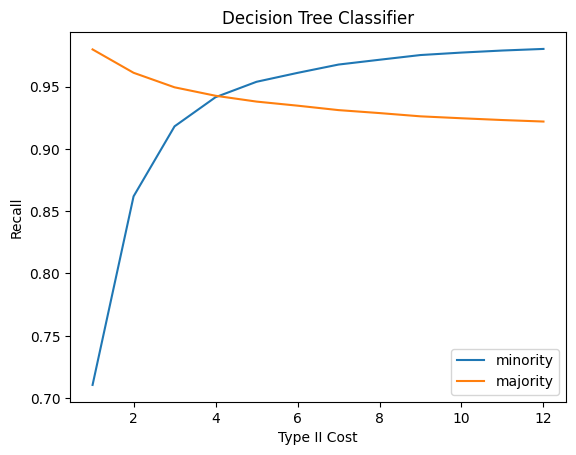

In [ ]:
plt.plot(ratio, recall_minority, label='minority')
plt.plot(ratio, recall_majority, label='majority')
plt.xlabel('Type II Cost')
plt.ylabel('Recall')
plt.title('Decision Tree Classifier')
plt.legend()
plt.show()

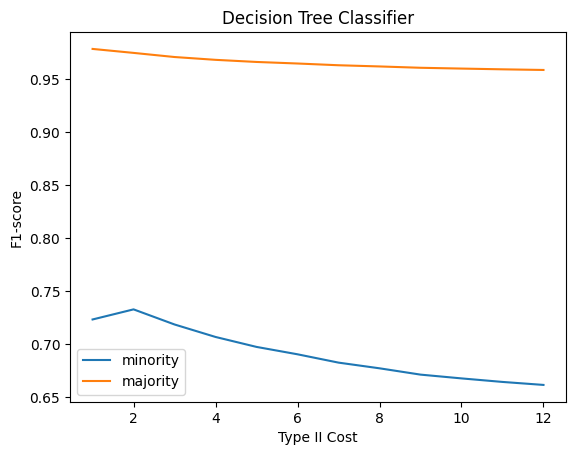

In [ ]:
plt.plot(ratio, f1_minority, label='minority')
plt.plot(ratio, f1_majority, label='majority')
plt.xlabel('Type II Cost')
plt.ylabel('F1-score')
plt.title('Decision Tree Classifier')
plt.legend()
plt.show()

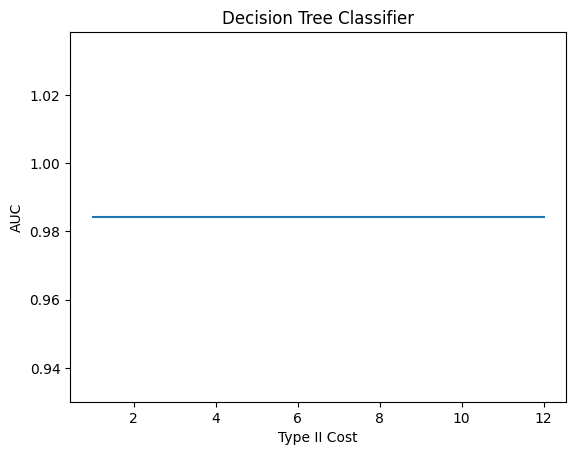

In [ ]:
plt.plot(ratio, auc)
plt.xlabel('Type II Cost')
plt.ylabel('AUC')
plt.title('Decision Tree Classifier')
plt.show()

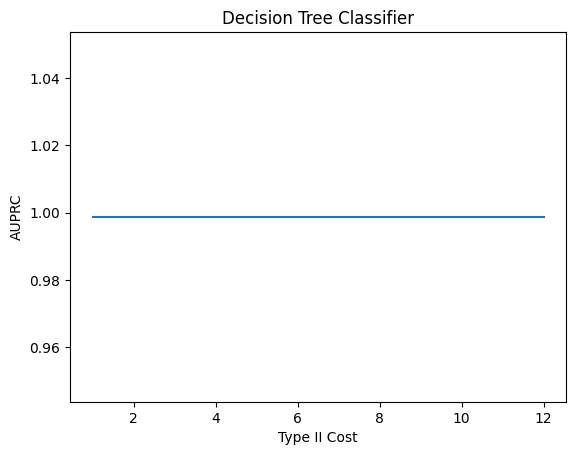

In [ ]:
plt.plot(ratio, auprc)
plt.xlabel('Type II Cost')
plt.ylabel('AUPRC')
plt.title('Decision Tree Classifier')
plt.show()

**Ensemble Learner**

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 5.2 MB/s eta 0:00:00


In [ ]:
import time
import xgboost as XGB
from lightgbm import LGBMClassifier as LGBM
from catboost import CatBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean, std

LightGBM

In [ ]:
# evaluated the model
lgbm = LGBM(random_state = 42)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(lgbm, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.943 (0.001)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 777158, number of negative: 61702
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.095132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 167
[LightGBM] [Info] Number of data points in the train set: 838860, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.926445 -> initscore=2.533327
[LightGBM] [Info] Start training from score 2.533327
Execution time: 10.468010902404785
              precision    recall  f1-score   support

           0       0.65      0.48      0.55     15240
           1       0.96      0.98      0.97    194475

    accuracy                           0.94    209715
   macro avg       0.80      0.73      0.76    209715
weighted avg       0.94      0.94      0.94    209715

AUC score:  0.9619010789868003
AUPRC score:  1.0


In [ ]:
# fit the model on the whole dataset
lgbm = LGBM(random_state = 42)
start_time = time.time()
lgbm.fit(X_train,y_train)
end_time = time.time()
print("Execution time:", end_time - start_time)

# make predictions for test data
y_pred_lgbm = lgbm.predict(X_test)
print(classification_report(y_test,y_pred_lgbm))

y_prob_lgbm = lgbm.predict_proba(X_test)[:, 1]
auc_score_lgbm = roc_auc_score(y_test, y_prob_lgbm)
print("AUC score: ", auc_score)
auprc_score_lgbm = average_precision_score(y_test, y_test)
print("AUPRC score: ", auprc_score_lgbm)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 777158, number of negative: 61702
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.097723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 167
[LightGBM] [Info] Number of data points in the train set: 838860, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.926445 -> initscore=2.533327
[LightGBM] [Info] Start training from score 2.533327
Execution time: 10.468632936477661
              precision    recall  f1-score   support

           0       0.65      0.48      0.55     15240
           1       0.96      0.98      0.97    194475

    accuracy                           0.94    209715
   macro avg       0.80      0.73      0.76    209715
weighted avg       0.94      0.94      0.94    209715

AUC score:  0.9619010789868003
AUPRC score:  1.0


In [ ]:
# fit the model on the whole dataset
lgbm = LGBM(random_state = 42,class_weight={0:6,1:1})
start_time = time.time()
lgbm.fit(X_train,y_train)
end_time = time.time()
print("Execution time:", end_time - start_time)

# make predictions for test data
y_pred_lgbm = lgbm.predict(X_test)
print(classification_report(y_test,y_pred_lgbm))

y_prob_lgbm = lgbm.predict_proba(X_test)[:, 1]
auc_score_lgbm = roc_auc_score(y_test, y_prob_lgbm)
print("AUC score: ", auc_score)
auprc_score_lgbm = average_precision_score(y_test, y_test)
print("AUPRC score: ", auprc_score_lgbm)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 777158, number of negative: 61702
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.138114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 167
[LightGBM] [Info] Number of data points in the train set: 838860, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.677339 -> initscore=0.741568
[LightGBM] [Info] Start training from score 0.741568
Execution time: 16.981449365615845
              precision    recall  f1-score   support

           0       0.43      0.92      0.58     15240
           1       0.99      0.90      0.95    194475

    accuracy                           0.90    209715
   macro avg       0.71      0.91      0.76    209715
weighted avg       0.95      0.90      0.92    209715

AUC score:  0.8534617853639872
AUPRC score:  1.0


XGBoost

In [ ]:
# evaluated the model
xgb = XGB.XGBClassifier(random_state = 42)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(gbm, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.942 (0.001)
Execution time: 8.705250263214111
              precision    recall  f1-score   support

           0       0.64      0.49      0.56     15240
           1       0.96      0.98      0.97    194475

    accuracy                           0.94    209715
   macro avg       0.80      0.73      0.76    209715
weighted avg       0.94      0.94      0.94    209715

AUC score:  0.9619010789868003
AUPRC score:  1.0


In [ ]:
# fit the model on the whole dataset
xgb = XGB.XGBClassifier(random_state = 42)
start_time = time.time()
xgb.fit(X_train,y_train)
end_time = time.time()
print("Execution time:", end_time - start_time)

# make predictions for test data
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test,y_pred_xgb))

y_prob_xgb = xgb.predict_proba(X_test)[:, 1]
auc_score_xgb = roc_auc_score(y_test, y_prob_xgb)
print("AUC score: ", auc_score)
auprc_score_xgb = average_precision_score(y_test, y_test)
print("AUPRC score: ", auprc_score_xgb)

Execution time: 6.4870710372924805
              precision    recall  f1-score   support

           0       0.64      0.49      0.56     15240
           1       0.96      0.98      0.97    194475

    accuracy                           0.94    209715
   macro avg       0.80      0.73      0.76    209715
weighted avg       0.94      0.94      0.94    209715

AUC score:  0.9619010789868003
AUPRC score:  1.0


CatBoost

In [ ]:
# evaluated the model
cat = CatBoostClassifier(random_state = 42)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(gbm, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.942 (0.001)
Learning rate set to 0.182536
0:	learn: 0.3709622	total: 246ms	remaining: 4m 5s
1:	learn: 0.2377360	total: 428ms	remaining: 3m 33s
2:	learn: 0.1800749	total: 608ms	remaining: 3m 22s
3:	learn: 0.1563661	total: 801ms	remaining: 3m 19s
4:	learn: 0.1453023	total: 982ms	remaining: 3m 15s
5:	learn: 0.1395203	total: 1.15s	remaining: 3m 11s
6:	learn: 0.1347822	total: 1.32s	remaining: 3m 7s
7:	learn: 0.1320255	total: 1.5s	remaining: 3m 5s
8:	learn: 0.1304750	total: 1.68s	remaining: 3m 4s
9:	learn: 0.1291174	total: 1.86s	remaining: 3m 4s
10:	learn: 0.1281608	total: 2.04s	remaining: 3m 3s
11:	learn: 0.1272495	total: 2.21s	remaining: 3m 2s
12:	learn: 0.1267138	total: 2.39s	remaining: 3m 1s
13:	learn: 0.1262447	total: 2.55s	remaining: 2m 59s
14:	learn: 0.1255941	total: 2.74s	remaining: 2m 59s
15:	learn: 0.1253281	total: 2.92s	remaining: 2m 59s
16:	learn: 0.1250561	total: 3.1s	remaining: 2m 59s
17:	learn: 0.1247180	total: 3.27s	remaining: 2m 58s
18:	learn: 0.1244444	total: 3.

In [ ]:
# fit the model on the whole dataset
cat = CatBoostClassifier(random_state = 42)
start_time = time.time()
cat.fit(X_train,y_train)
end_time = time.time()
print("Execution time:", end_time - start_time)

# make predictions for test data
y_pred_cat = cat.predict(X_test)
print(classification_report(y_test,y_pred_cat))

y_prob_cat = cat.predict_proba(X_test)[:, 1]
auc_score_cat = roc_auc_score(y_test, y_prob_cat)
print("AUC score: ", auc_score)
auprc_score_cat = average_precision_score(y_test, y_test)
print("AUPRC score: ", auprc_score_cat)

Learning rate set to 0.182536
0:	learn: 0.3709622	total: 184ms	remaining: 3m 3s
1:	learn: 0.2377360	total: 376ms	remaining: 3m 7s
2:	learn: 0.1800749	total: 562ms	remaining: 3m 6s
3:	learn: 0.1563661	total: 739ms	remaining: 3m 4s
4:	learn: 0.1453023	total: 938ms	remaining: 3m 6s
5:	learn: 0.1395203	total: 1.13s	remaining: 3m 6s
6:	learn: 0.1347822	total: 1.3s	remaining: 3m 4s
7:	learn: 0.1320255	total: 1.48s	remaining: 3m 3s
8:	learn: 0.1304750	total: 1.66s	remaining: 3m 3s
9:	learn: 0.1291174	total: 1.84s	remaining: 3m 2s
10:	learn: 0.1281608	total: 2.04s	remaining: 3m 3s
11:	learn: 0.1272495	total: 2.2s	remaining: 3m 1s
12:	learn: 0.1267138	total: 2.38s	remaining: 3m
13:	learn: 0.1262447	total: 2.54s	remaining: 2m 59s
14:	learn: 0.1255941	total: 2.72s	remaining: 2m 58s
15:	learn: 0.1253281	total: 2.91s	remaining: 2m 58s
16:	learn: 0.1250561	total: 3.09s	remaining: 2m 58s
17:	learn: 0.1247180	total: 3.25s	remaining: 2m 57s
18:	learn: 0.1244444	total: 3.42s	remaining: 2m 56s
19:	learn:

In [ ]:
# fit the model on the whole dataset
cat = CatBoostClassifier(random_state = 42,class_weights={0:6,1:1})
start_time = time.time()
cat.fit(X_train,y_train)
end_time = time.time()
print("Execution time:", end_time - start_time)

# make predictions for test data
y_pred_cat = cat.predict(X_test)
print(classification_report(y_test,y_pred_cat))

y_prob_cat = cat.predict_proba(X_test)[:, 1]
auc_score_cat = roc_auc_score(y_test, y_prob_cat)
print("AUC score: ", auc_score)
auprc_score_cat = average_precision_score(y_test, y_test)
print("AUPRC score: ", auprc_score_cat)

Learning rate set to 0.182536
0:	learn: 0.4726780	total: 297ms	remaining: 4m 56s
1:	learn: 0.3666778	total: 659ms	remaining: 5m 28s
2:	learn: 0.3119211	total: 955ms	remaining: 5m 17s
3:	learn: 0.2853691	total: 1.25s	remaining: 5m 11s
4:	learn: 0.2693575	total: 1.53s	remaining: 5m 5s
5:	learn: 0.2579932	total: 1.86s	remaining: 5m 8s
6:	learn: 0.2519009	total: 2.18s	remaining: 5m 9s
7:	learn: 0.2476390	total: 2.48s	remaining: 5m 7s
8:	learn: 0.2437422	total: 2.68s	remaining: 4m 54s
9:	learn: 0.2411623	total: 3.02s	remaining: 4m 59s
10:	learn: 0.2389219	total: 3.4s	remaining: 5m 5s
11:	learn: 0.2374472	total: 3.69s	remaining: 5m 3s
12:	learn: 0.2363824	total: 4.02s	remaining: 5m 4s
13:	learn: 0.2353811	total: 4.32s	remaining: 5m 3s
14:	learn: 0.2345605	total: 4.61s	remaining: 5m 2s
15:	learn: 0.2336034	total: 4.95s	remaining: 5m 4s
16:	learn: 0.2329725	total: 5.32s	remaining: 5m 7s
17:	learn: 0.2324383	total: 5.67s	remaining: 5m 9s
18:	learn: 0.2317973	total: 6.05s	remaining: 5m 12s
19:	l

1.  https://www.kaggle.com/code/ercanholasoglu/comparing-tree-based-models-with-covid-19-dataset
2.  https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/
3.  https://machinelearningmastery.com/cost-sensitive-decision-trees-for-imbalanced-classification/